In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
%matplotlib inline
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import os,re
import docx2txt
import textract
import pdfminer
import pandas as pd
import numpy as np
from docx import Document
import sys
from tqdm import tqdm
import string
import seaborn as sns
import spacy

In [2]:
folder_Name = []
resume = []
Folder_Code = []

class_names = ['Peoplesoft resumes', 'React JS resumes', 'SQL Developer Lightning insight', 'workday resumes']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

print (class_names_label)

number_of_classes = len(class_names)

{'Peoplesoft resumes': 0, 'React JS resumes': 1, 'SQL Developer Lightning insight': 2, 'workday resumes': 3}


In [3]:
def load_data():
    
    dataset = "E:\\backup\\OneDrive\\Desktop\\Data Science\\Project\\Resume Classification\\Resumes-20211103T133301Z-001.zip (Unzipped Files) - Copy - Copy\\Resumes"
        
    for folder in os.listdir(dataset):
        label = class_names_label[folder]
        for file in tqdm(os.listdir(os.path.join(dataset, folder))):
            file_path = os.path.join(os.path.join(dataset, folder), file)
            text = docx2txt.process(file_path)
            resume.append(text)
            folder_Name.append(folder)
            Folder_Code.append(label)

In [4]:
load_data()

100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:03<00:00,  6.51it/s]


In [5]:
data = {'Resumes': resume,
        'Category': folder_Name,
        'Folder Code': Folder_Code}
df = pd.DataFrame(data=data,columns=['Resumes','Category','Folder Code'])

In [6]:
df

Resumes            Category  \
0   Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...  Peoplesoft resumes   
1   G. Ananda Rayudu \n\n\t\t       https://www.li...  Peoplesoft resumes   
2   PeopleSoft Database Administrator\n\n         ...  Peoplesoft resumes   
3   Classification: Internal\n\nClassification: In...  Peoplesoft resumes   
4   Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...  Peoplesoft resumes   
..                                                ...                 ...   
74  Workday Integration Consultant\n\n\n\nName    ...     workday resumes   
75  Srikanth (WORKDAY hCM Consultant)\t           ...     workday resumes   
76  WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...     workday resumes   
77  Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...     workday resumes   
78  Vinay kumar .v\nWorkday Functional Consultant\...     workday resumes   

    Folder Code  
0             0  
1             0  
2             0  
3             0  
4             0  
..          ...  
74            3  
75            3  
76            3  
77            3  
78            3  

[79 rows x 3 columns]

In [7]:
df[df.duplicated()]

Empty DataFrame
Columns: [Resumes, Category, Folder Code]
Index: []

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Resumes      79 non-null     object
 1   Category     79 non-null     object
 2   Folder Code  79 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 2.0+ KB


In [9]:
df.isnull().sum()

Resumes        0
Category       0
Folder Code    0
dtype: int64

<AxesSubplot:xlabel='count', ylabel='Category'>

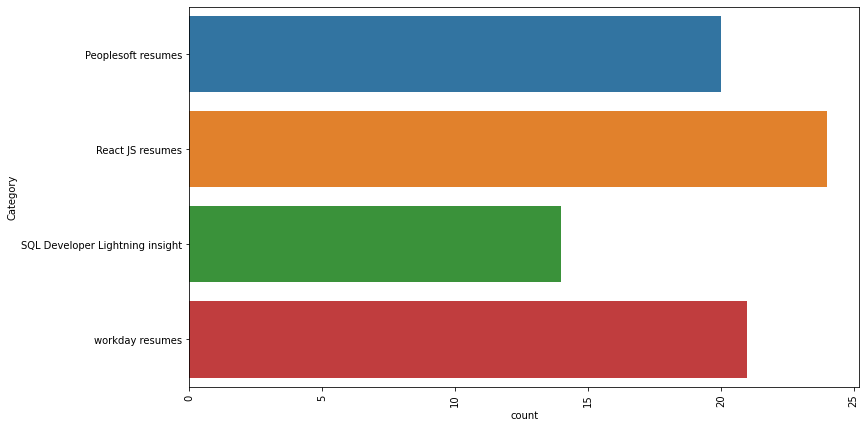

In [10]:
plt.figure(figsize=(12,7))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=df)

In [11]:
from matplotlib.gridspec import GridSpec

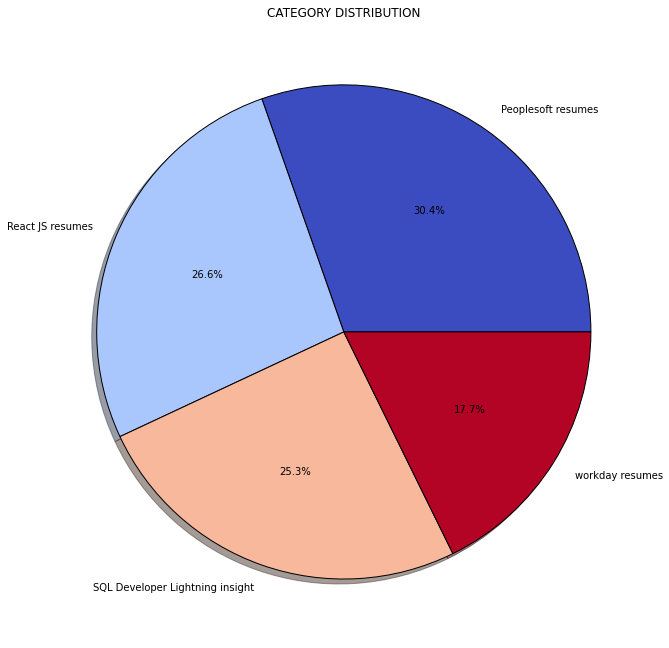

In [12]:
targetCounts = df['Category'].value_counts()
targetLabels  = df['Category'].unique()
plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0, 1, 4)]
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=colors,wedgeprops = {"edgecolor" : "black",'linewidth': 1,'antialiased': True})
plt.show()

In [13]:
df['cleaned_resume'] = ''

In [14]:
df

Resumes            Category  \
0   Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...  Peoplesoft resumes   
1   G. Ananda Rayudu \n\n\t\t       https://www.li...  Peoplesoft resumes   
2   PeopleSoft Database Administrator\n\n         ...  Peoplesoft resumes   
3   Classification: Internal\n\nClassification: In...  Peoplesoft resumes   
4   Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...  Peoplesoft resumes   
..                                                ...                 ...   
74  Workday Integration Consultant\n\n\n\nName    ...     workday resumes   
75  Srikanth (WORKDAY hCM Consultant)\t           ...     workday resumes   
76  WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...     workday resumes   
77  Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...     workday resumes   
78  Vinay kumar .v\nWorkday Functional Consultant\...     workday resumes   

    Folder Code cleaned_resume  
0             0                 
1             0                 
2             0                 
3             0                 
4             0                 
..          ...            ...  
74            3                 
75            3                 
76            3                 
77            3                 
78            3                 

[79 rows x 4 columns]

In [15]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)
    resumeText = re.sub('RT|cc', ' ', resumeText)
    resumeText = re.sub('#\S+', '', resumeText)
    resumeText = re.sub('@\S+', '  ', resumeText)
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)
    return resumeText
    
df['cleaned_resume'] = df.Resumes.apply(lambda x: cleanResume(x))

In [16]:
df.head()

Resumes            Category  \
0  Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...  Peoplesoft resumes   
1  G. Ananda Rayudu \n\n\t\t       https://www.li...  Peoplesoft resumes   
2  PeopleSoft Database Administrator\n\n         ...  Peoplesoft resumes   
3  Classification: Internal\n\nClassification: In...  Peoplesoft resumes   
4  Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...  Peoplesoft resumes   

   Folder Code                                     cleaned_resume  
0            0  Anubhav Kumar Singh Core Competencies Scriptin...  
1            0  G Ananda Rayudu Profile Summary 7 years of exp...  
2            0  PeopleSoft Database Administrator Gangareddy P...  
3            0  Classification Internal Classification Interna...  
4            0  Priyanka Ramadoss 61 46 MountPleasant Coonoor ...

In [17]:
df_1 = df.copy()

In [18]:
df_1

Resumes            Category  \
0   Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...  Peoplesoft resumes   
1   G. Ananda Rayudu \n\n\t\t       https://www.li...  Peoplesoft resumes   
2   PeopleSoft Database Administrator\n\n         ...  Peoplesoft resumes   
3   Classification: Internal\n\nClassification: In...  Peoplesoft resumes   
4   Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...  Peoplesoft resumes   
..                                                ...                 ...   
74  Workday Integration Consultant\n\n\n\nName    ...     workday resumes   
75  Srikanth (WORKDAY hCM Consultant)\t           ...     workday resumes   
76  WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...     workday resumes   
77  Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...     workday resumes   
78  Vinay kumar .v\nWorkday Functional Consultant\...     workday resumes   

    Folder Code                                     cleaned_resume  
0             0  Anubhav Kumar Singh Core Competencies Scriptin...  
1             0  G Ananda Rayudu Profile Summary 7 years of exp...  
2             0  PeopleSoft Database Administrator Gangareddy P...  
3             0  Classification Internal Classification Interna...  
4             0  Priyanka Ramadoss 61 46 MountPleasant Coonoor ...  
..          ...                                                ...  
74            3  Workday Integration Consultant Name Sri Krishn...  
75            3  Srikanth WORKDAY hCM Consultant Seeking suitab...  
76            3  WORKDAY HCM FCM Name Kumar S S Role Workday Co...  
77            3  Venkateswarlu B Workday Consultant Professiona...  
78            3  Vinay kumar v Workday Functional Consultant EX...  

[79 rows x 4 columns]

In [19]:
freq = pd.Series(' '.join(df_1['cleaned_resume']).split()).value_counts()[:20]
freq

and            2863
the            1378
in             1287
to             1123
of             1043
for             677
on              671
with            434
PeopleSoft      429
a               402
as              391
using           380
Workday         361
Experience      331
from            316
Application     288
SQL             263
Project         237
experience      231
8               225
dtype: int64

In [20]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df_1['cleaned_resume'] = df_1['cleaned_resume'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [21]:
freq_Sw = pd.Series(' '.join(df_1['cleaned_resume']).split()).value_counts()[:20]
freq_Sw

PeopleSoft     429
using          380
Workday        361
Experience     331
Application    288
SQL            263
Project        237
experience     231
8              225
Server         223
data           215
2              211
reports        188
business       183
HCM            179
like           178
Worked         168
9              166
Web            165
Involved       159
dtype: int64

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X_0 = vectorizer.fit_transform(df_1['cleaned_resume'])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X_0.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])

In [23]:
word_freq_df.head(30)

term  occurrences  frequency
0           000            2   0.000047
1           006            1   0.000024
2            01            3   0.000071
3           016            1   0.000024
4           017            1   0.000024
5            02            2   0.000047
6            03            9   0.000213
7           032            1   0.000024
8            04            8   0.000189
9          04th            2   0.000047
10           05            7   0.000166
11         05th            1   0.000024
12           06            5   0.000118
13         06th            1   0.000024
14           07            5   0.000118
15         07th            1   0.000024
16           08           13   0.000308
17           09            4   0.000095
18  0production            1   0.000024
19           10           62   0.001467
20          100            5   0.000118
21          10g           16   0.000379
22        10gr2            4   0.000095
23        10gr3            2   0.000047
24     10gr3and            1   0.000024
25         10th            4   0.000095
26           11           16   0.000379
27          11g           24   0.000568
28        11gr2            9   0.000213
29          11i            2   0.000047

In [24]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [25]:
top2_words = get_top_n2_words(df_1['cleaned_resume'], n=200)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head(10)

Bi-gram  Freq
0          sql server   116
1   process scheduler   107
2            react js   100
3  application server    93
4        people tools    77
5      workday studio    72
6   calculated fields    71
7      server domains    70
8         workday hcm    69
9           till date    67

[Text(0, 0, 'sql server'),
 Text(1, 0, 'process scheduler'),
 Text(2, 0, 'react js'),
 Text(3, 0, 'application server'),
 Text(4, 0, 'people tools'),
 Text(5, 0, 'workday studio'),
 Text(6, 0, 'calculated fields'),
 Text(7, 0, 'server domains'),
 Text(8, 0, 'workday hcm'),
 Text(9, 0, 'till date'),
 Text(10, 0, 'custom reports'),
 Text(11, 0, 'web server'),
 Text(12, 0, 'good knowledge'),
 Text(13, 0, 'report writer'),
 Text(14, 0, 'hands experience'),
 Text(15, 0, 'web services'),
 Text(16, 0, 'business process'),
 Text(17, 0, 'experience peoplesoft'),
 Text(18, 0, 'years experience'),
 Text(19, 0, 'integration broker')]

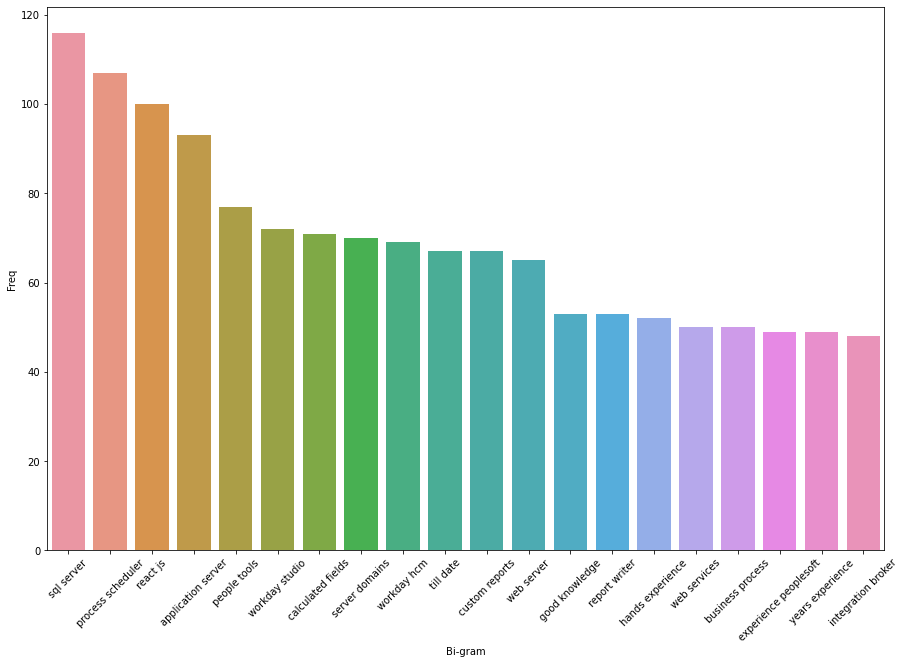

In [26]:
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (15, 10))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])

In [27]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [28]:
top3_words = get_top_n3_words(df_1['cleaned_resume'], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

In [29]:
top3_df.head(10)

Tri-gram  Freq
0        application server domains    37
1         process scheduler servers    36
2            server domains process    35
3         domains process scheduler    35
4                web server domains    27
5               servers web servers    26
6  peoplesoft internet architecture    26
7                domains web server    24
8               true best knowledge    24
9         servers process scheduler    21

[Text(0, 0, 'application server domains'),
 Text(1, 0, 'process scheduler servers'),
 Text(2, 0, 'server domains process'),
 Text(3, 0, 'domains process scheduler'),
 Text(4, 0, 'web server domains'),
 Text(5, 0, 'servers web servers'),
 Text(6, 0, 'peoplesoft internet architecture'),
 Text(7, 0, 'domains web server'),
 Text(8, 0, 'true best knowledge'),
 Text(9, 0, 'servers process scheduler'),
 Text(10, 0, 'operating systems windows'),
 Text(11, 0, 'inbound outbound integrations'),
 Text(12, 0, 'application servers web'),
 Text(13, 0, 'process scheduler server'),
 Text(14, 0, 'ms sql server'),
 Text(15, 0, 'declaration hereby declare'),
 Text(16, 0, 'server process scheduler'),
 Text(17, 0, '2018 till date'),
 Text(18, 0, 'peoplesoft update manager'),
 Text(19, 0, 'process scheduler domains')]

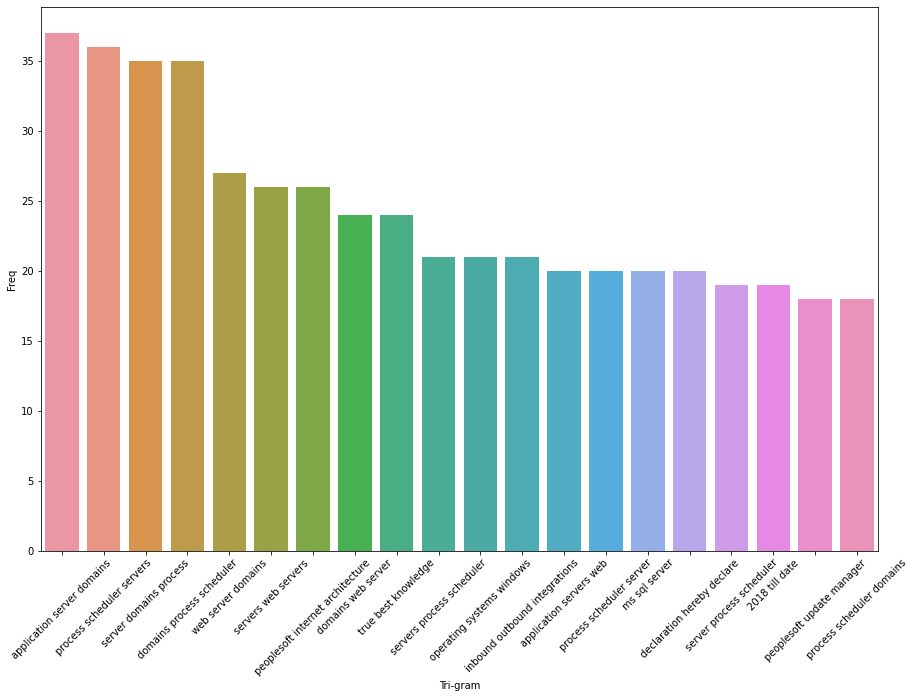

In [30]:
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (15, 10))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])

In [31]:
from wordcloud import WordCloud, STOPWORDS
from matplotlib.pyplot import imread

In [32]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

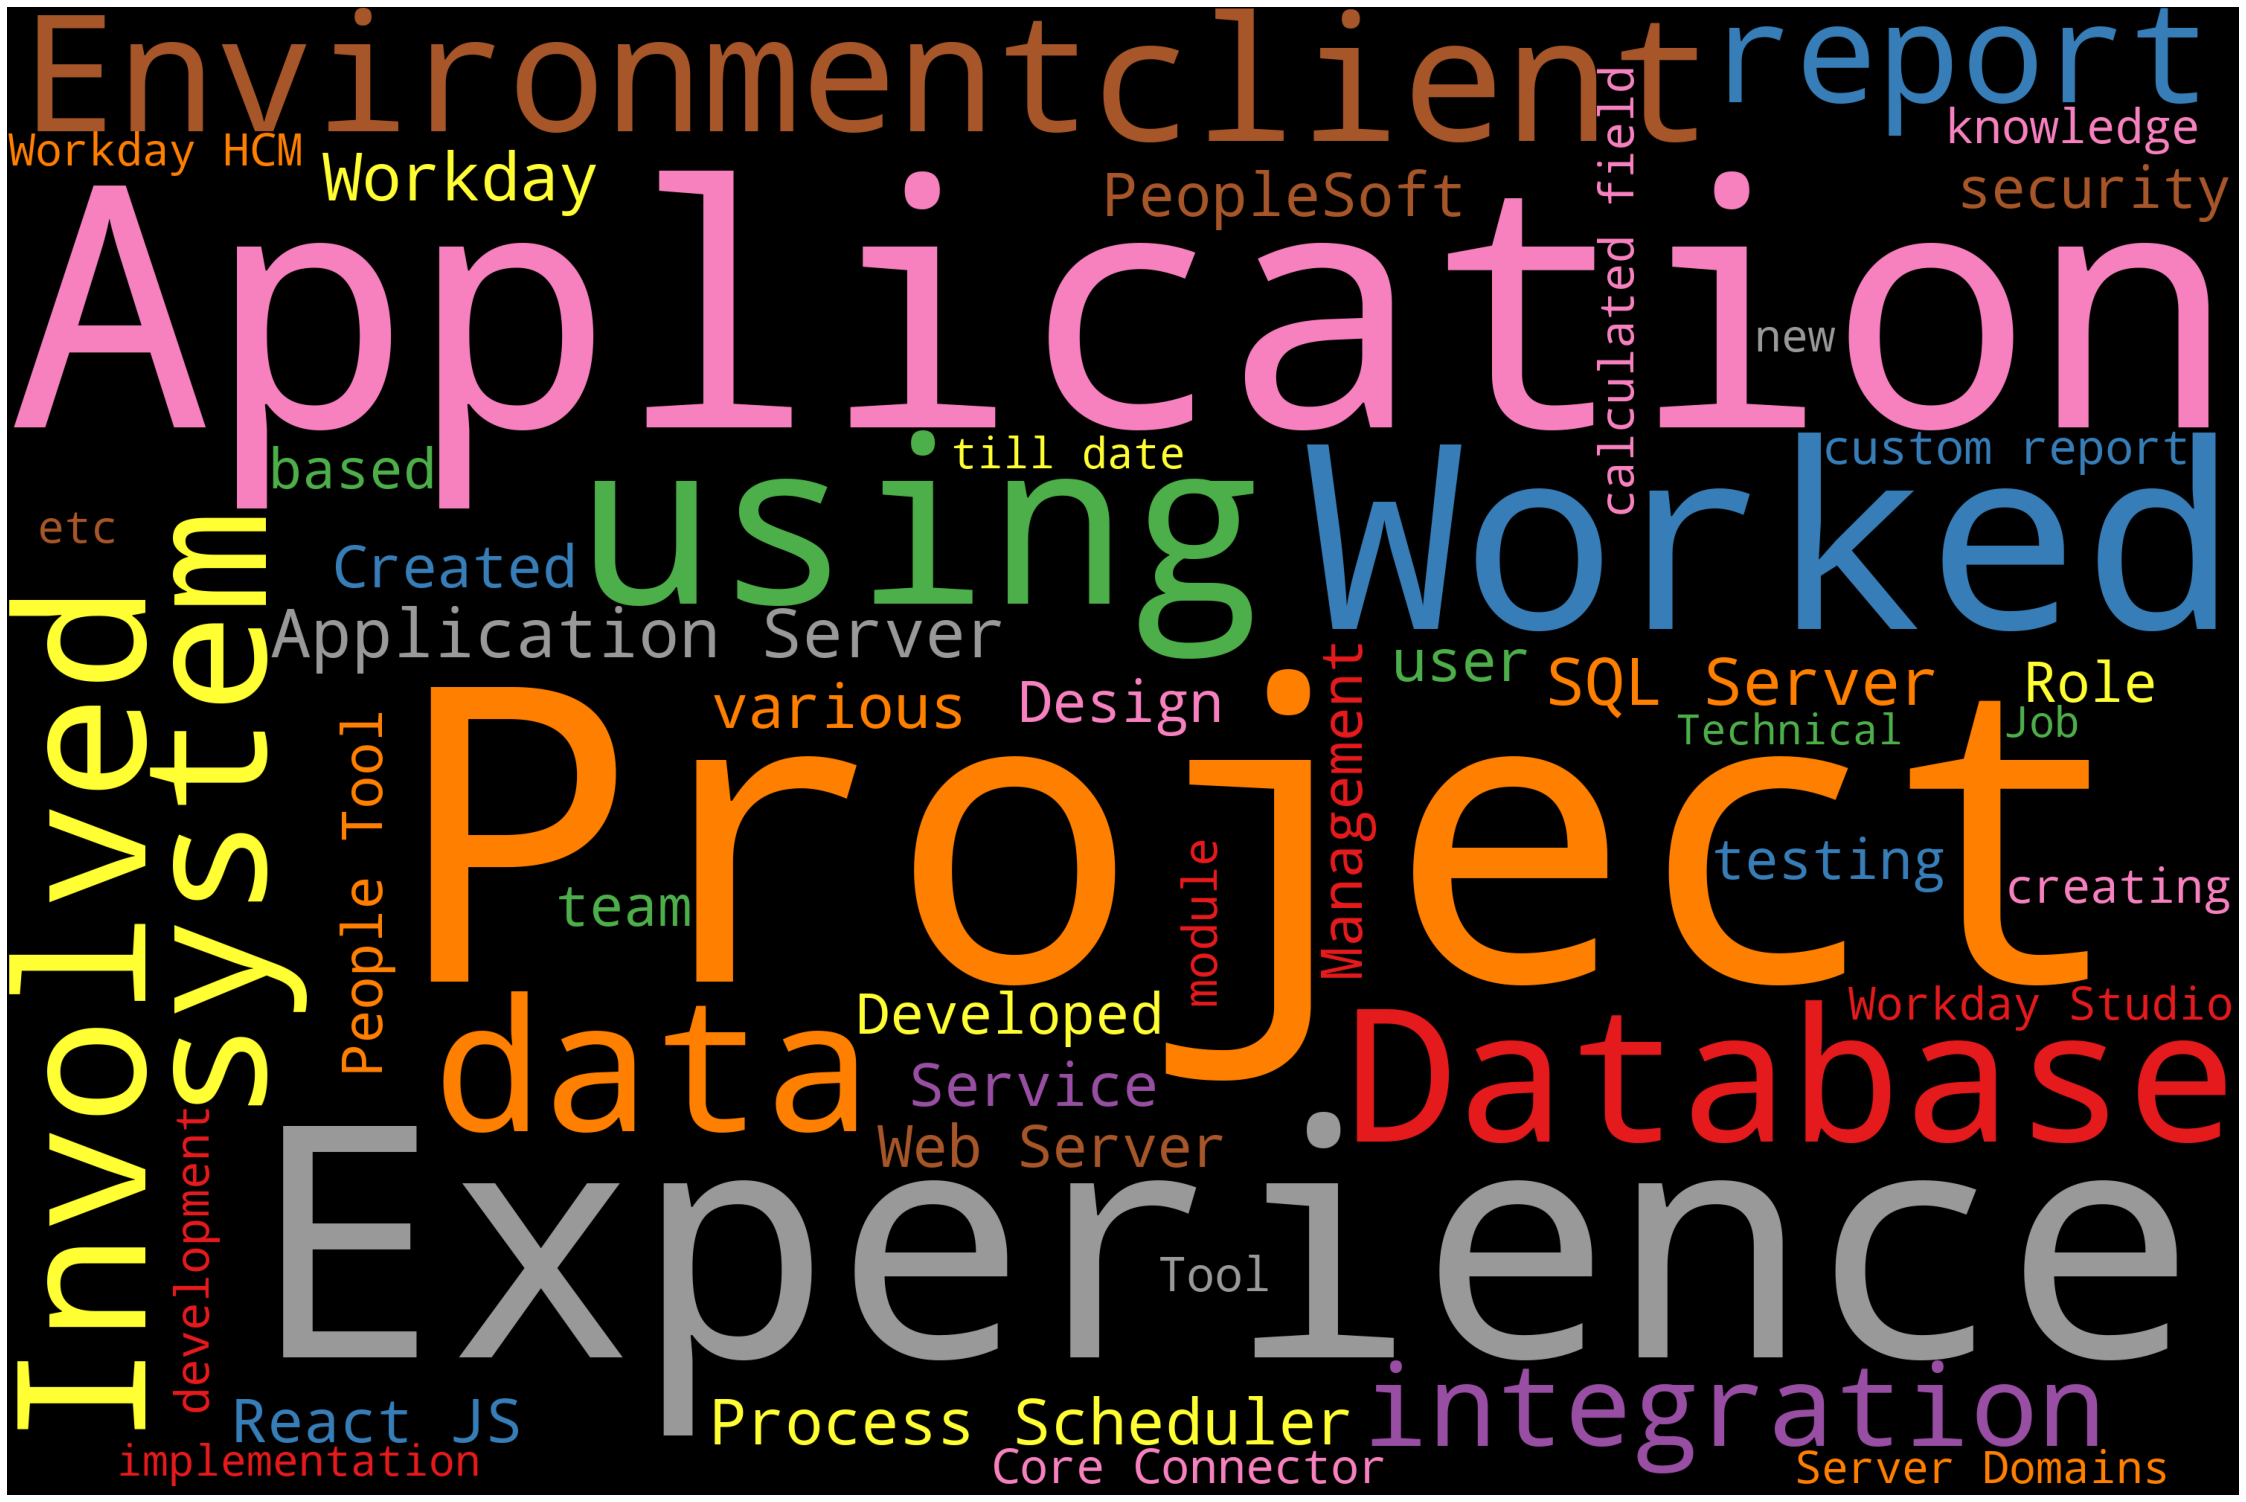

In [33]:
STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(' '.join(df_1['cleaned_resume']))
plot_cloud(wordcloud)

In [34]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

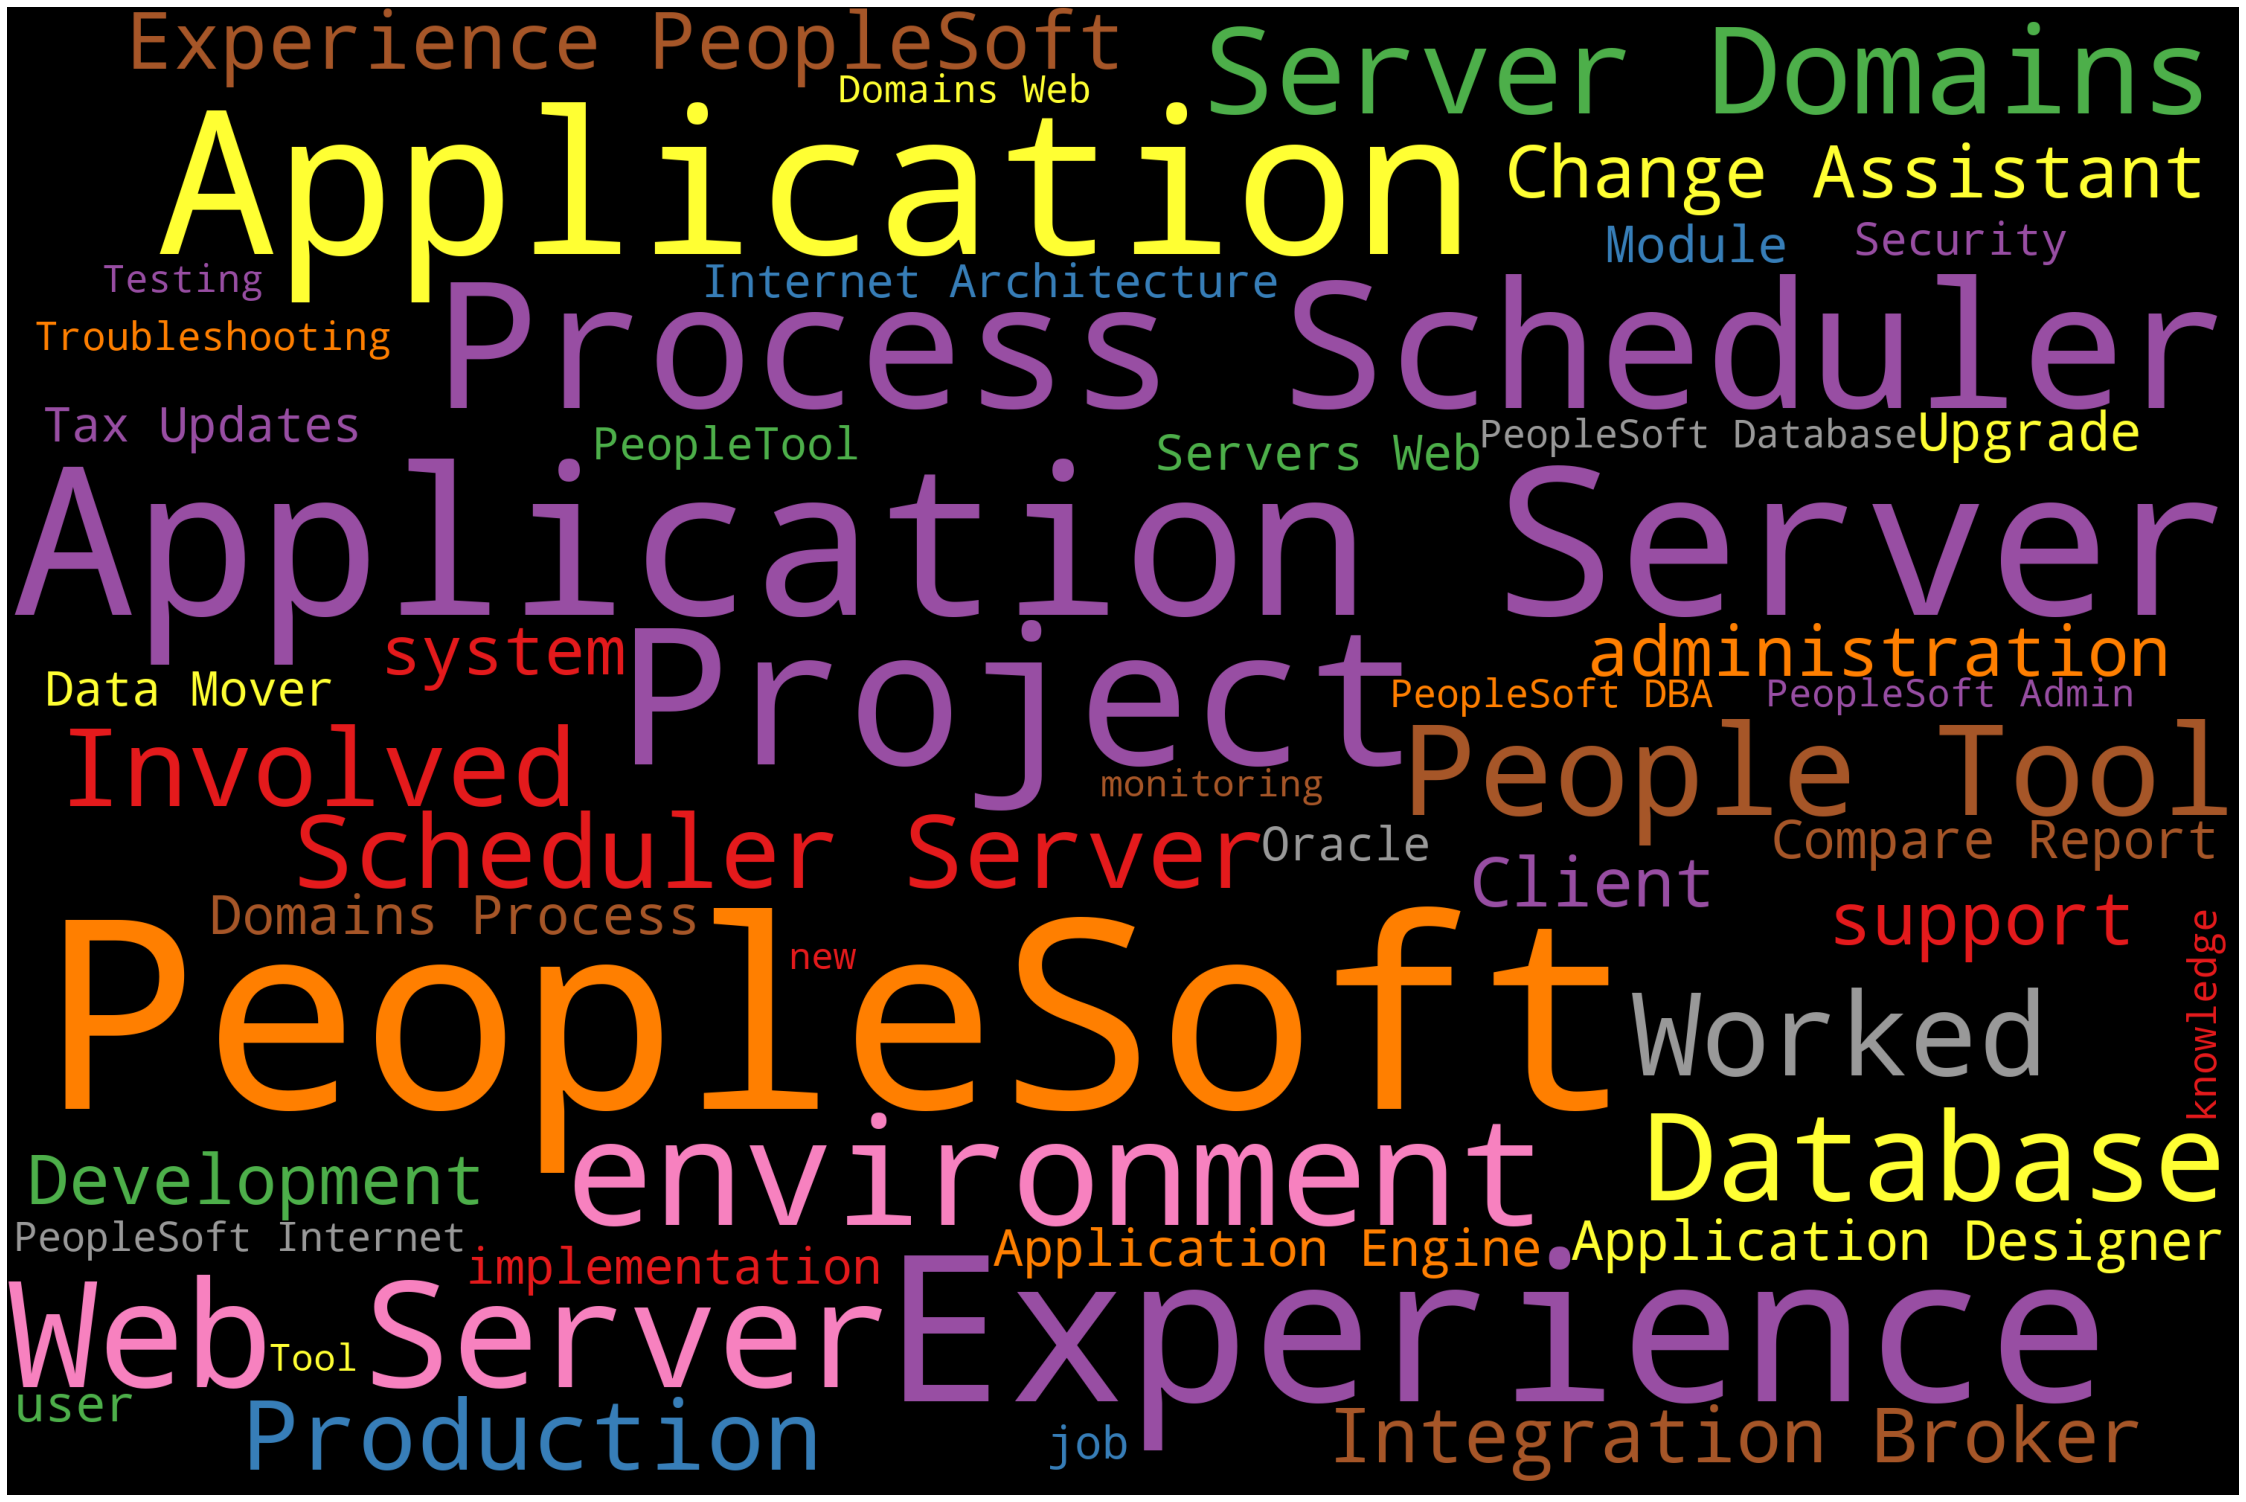

In [35]:
STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(' '.join(df_1.iloc[:20,3]))
plot_cloud(wordcloud)

In [36]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

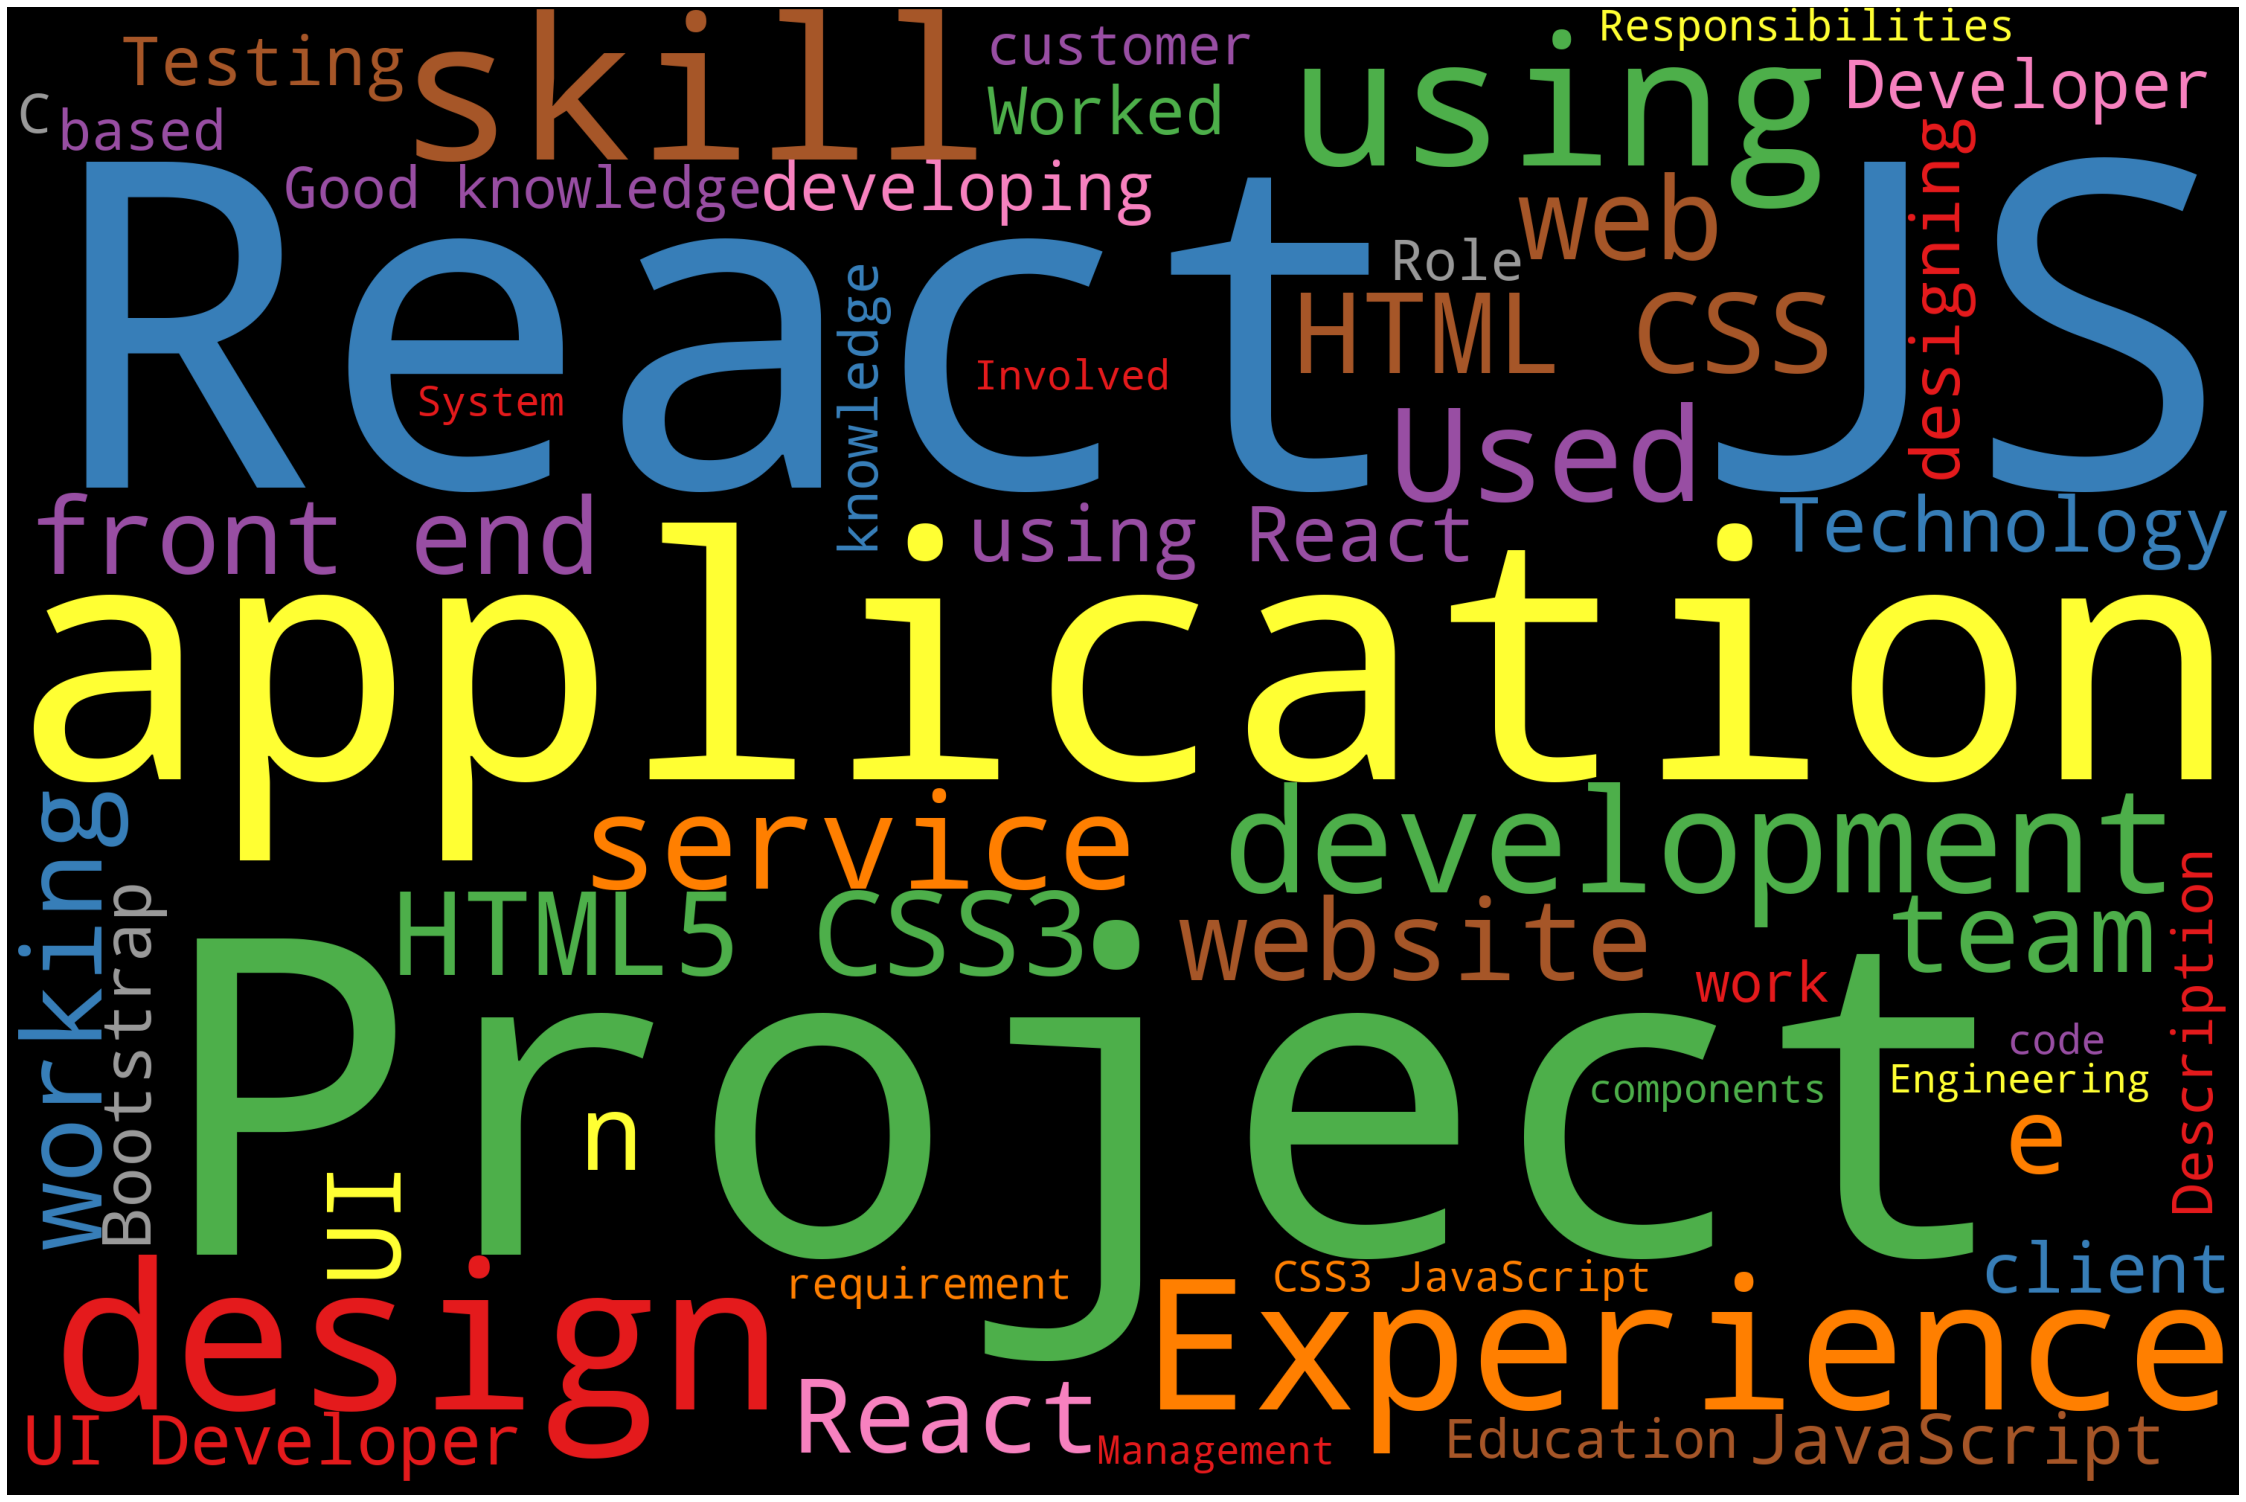

In [37]:
STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(' '.join(df_1.iloc[20:44,3]))
plot_cloud(wordcloud)

In [38]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

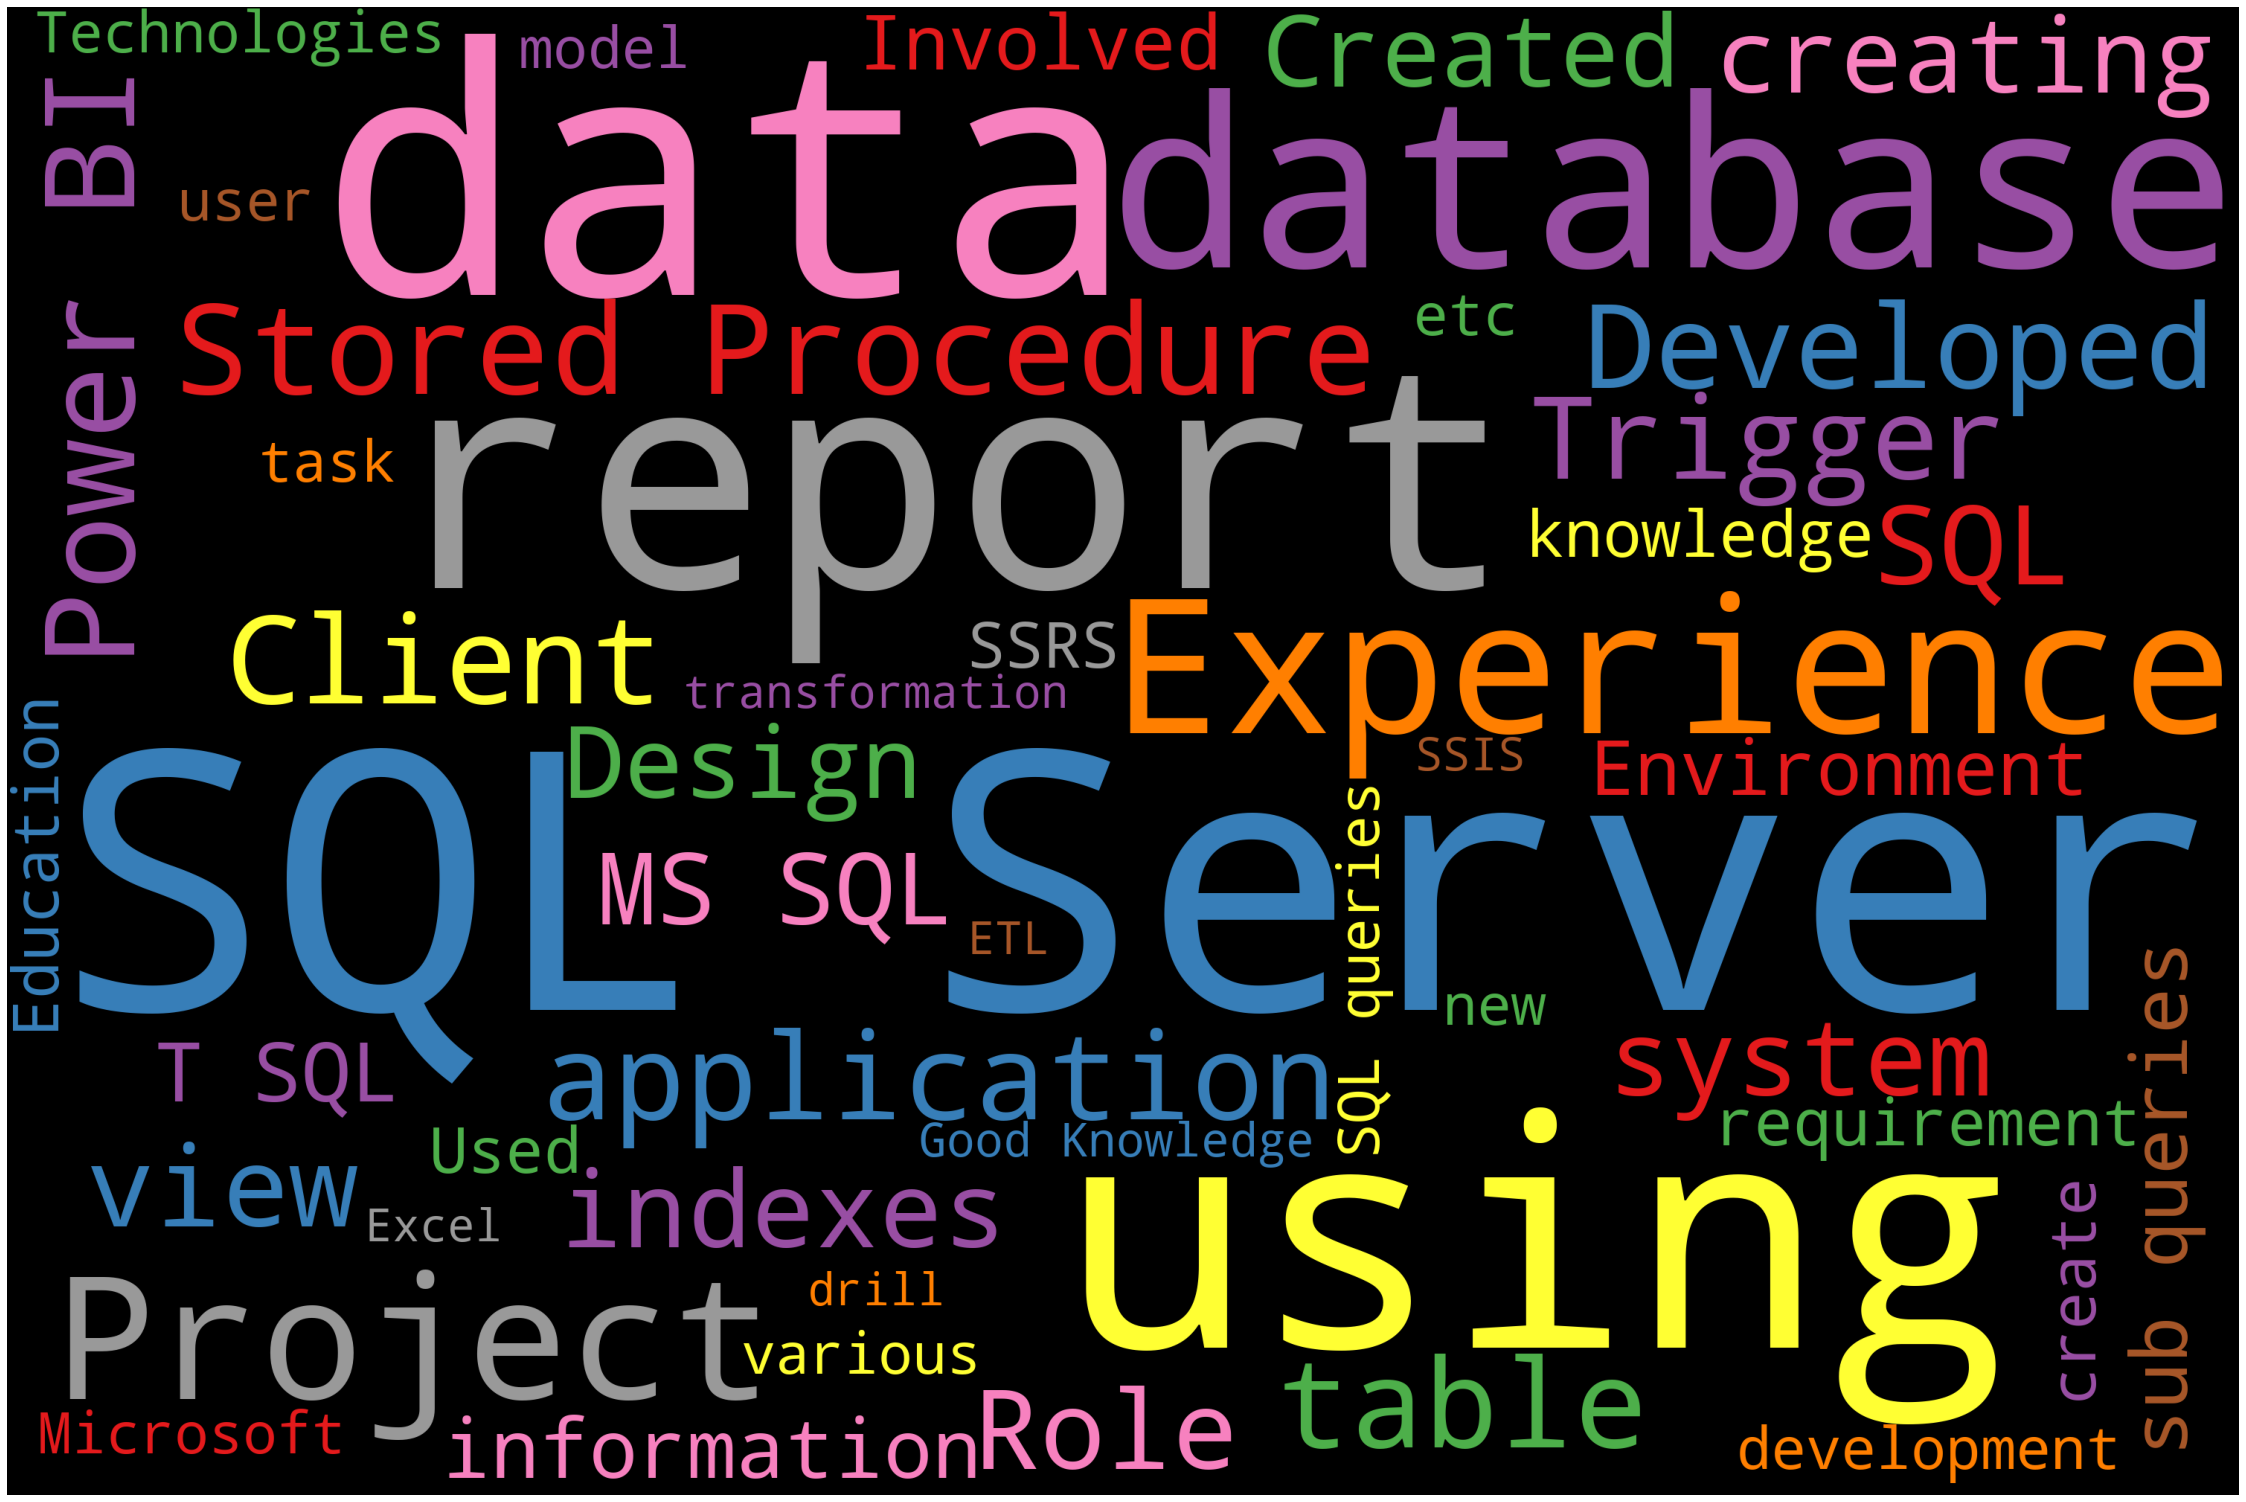

In [39]:
STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(' '.join(df_1.iloc[44:58,3]))
plot_cloud(wordcloud)

In [40]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

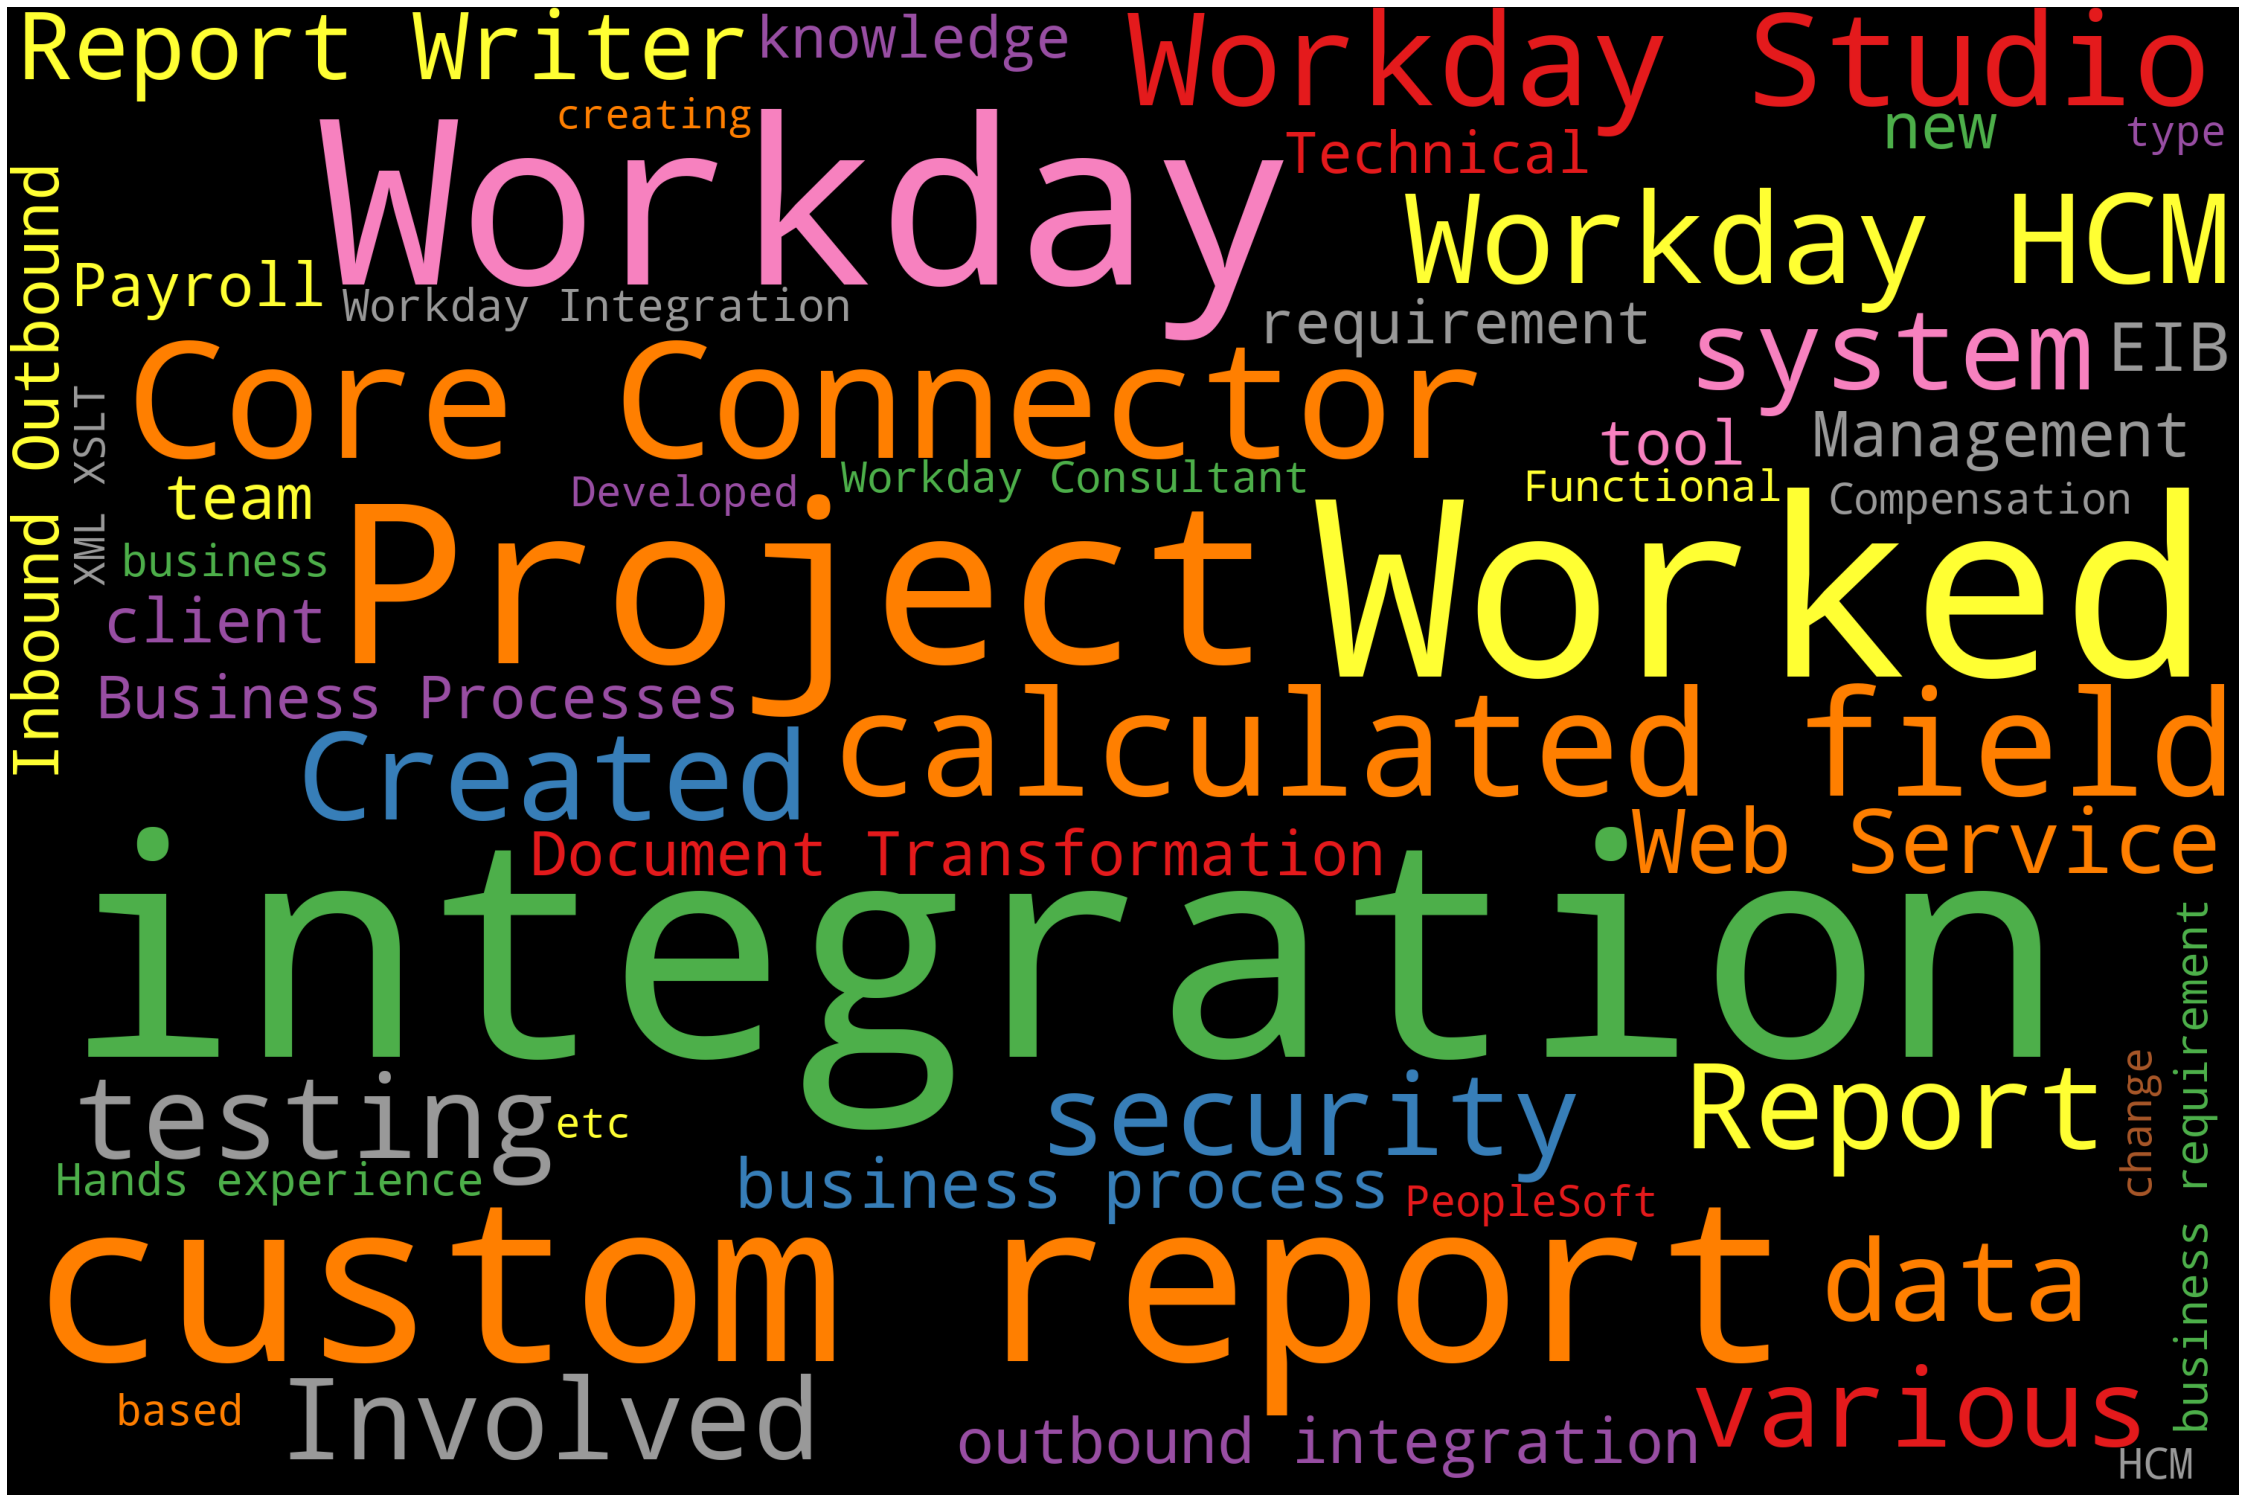

In [41]:
STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(' '.join(df_1.iloc[58:,3]))
plot_cloud(wordcloud)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = df_1['cleaned_resume'].values
requiredTarget = df_1['Folder Code'].values

In [43]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)


X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=42, test_size=0.3,
                                                 shuffle=True, stratify=requiredTarget)
print(X_train.shape)
print(X_test.shape)

(55, 4720)
(24, 4720)


In [81]:
word_vectorizer.get_feature_names()

['000',
 '006',
 '01',
 '016',
 '017',
 '02',
 '03',
 '032',
 '04',
 '04th',
 '05',
 '05th',
 '06',
 '06th',
 '07',
 '07th',
 '08',
 '09',
 '0production',
 '10',
 '100',
 '10g',
 '10gr2',
 '10gr3',
 '10gr3and',
 '10th',
 '11',
 '11g',
 '11gr2',
 '11i',
 '11th',
 '12',
 '12c',
 '12cr1',
 '12cr2',
 '12th',
 '13',
 '14',
 '15',
 '16',
 '17',
 '171',
 '18',
 '18c',
 '19',
 '197174',
 '1982',
 '1985',
 '1987',
 '1990',
 '1990s',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '19th',
 '1on',
 '1st',
 '200',
 '2000',
 '2001',
 '20011',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2008r2',
 '2009',
 '2010',
 '2011',
 '2012',
 '2012r2',
 '2013',
 '2014',
 '2015',
 '2016',
 '2016r2',
 '2017',
 '2018',
 '2019',
 '2019to',
 '2020',
 '2021',
 '2022',
 '204',
 '21',
 '22',
 '22nd',
 '23',
 '24',
 '25',
 '25th',
 '26',
 '27',
 '27th',
 '28',
 '281121',
 '29',
 '2k16',
 '2k18',
 '2years',
 '30',
 '300',
 '30th',
 '31',
 '32',
 '329',
 '33',
 '34',

In [44]:
WordFeatures

<79x4720 sparse matrix of type '<class 'numpy.float64'>'
	with 20750 stored elements in Compressed Sparse Row format>

In [61]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf_model=clf.fit(X_train, y_train)
clf_prediction = clf_model.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf_model.score(X_train, y_train)*100))
print('Accuracy of KNeighbors Classifier on test set:     {:.2f}'.format(clf_model.score(X_test, y_test)*100))

Accuracy of KNeighbors Classifier on training set: 96.36
Accuracy of KNeighbors Classifier on test set:     95.83


In [46]:
print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))


 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.86      0.92         7
           2       1.00      1.00      1.00         4
           3       0.88      1.00      0.93         7

    accuracy                           0.96        24
   macro avg       0.97      0.96      0.96        24
weighted avg       0.96      0.96      0.96        24




In [79]:
from sklearn.naive_bayes import MultinomialNB as MB
classifier_mb = OneVsRestClassifier(MB())
classifier_mb_model=classifier_mb.fit(X_train, y_train)
train_pred_m = classifier_mb_model.predict(X_test)
print('Accuracy of MultinomialNB Classifier on training set: {:.2f}'.format(classifier_mb_model.score(X_train, y_train)*100))
print('Accuracy of MultinomialNB Classifier on test set:     {:.2f}'.format(classifier_mb_model.score(X_test, y_test)*100))

Accuracy of MultinomialNB Classifier on training set: 100.00
Accuracy of MultinomialNB Classifier on test set:     100.00


In [80]:
print("\n Classification report for classifier %s:\n%s\n" % (classifier_mb_model, metrics.classification_report(y_test, train_pred_m)))


 Classification report for classifier OneVsRestClassifier(estimator=MultinomialNB()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         7

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24




In [65]:
olr = OneVsRestClassifier(LogisticRegression())
olr_model=olr.fit(X_train, y_train)
olr_prediction = olr_model.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(olr_model.score(X_train, y_train)*100))
print('Accuracy of KNeighbors Classifier on test set:     {:.2f}'.format(olr_model.score(X_test, y_test)*100))

Accuracy of KNeighbors Classifier on training set: 100.00
Accuracy of KNeighbors Classifier on test set:     95.83


In [69]:
print("\n Classification report for classifier %s:\n%s\n" % (olr_model, metrics.classification_report(y_test, olr_prediction)))


 Classification report for classifier OneVsRestClassifier(estimator=LogisticRegression()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.88      1.00      0.93         7
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00         7

    accuracy                           0.96        24
   macro avg       0.97      0.94      0.95        24
weighted avg       0.96      0.96      0.96        24




In [64]:
from sklearn.svm import SVC

In [68]:
svc = OneVsRestClassifier(SVC())
svc_model=svc.fit(X_train, y_train)
svc_prediction = svc_model.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(svc_model.score(X_train, y_train)*100))
print('Accuracy of KNeighbors Classifier on test set:     {:.2f}'.format(svc_model.score(X_test, y_test)*100))

Accuracy of KNeighbors Classifier on training set: 100.00
Accuracy of KNeighbors Classifier on test set:     100.00


In [70]:
print("\n Classification report for classifier %s:\n%s\n" % (svc_model, metrics.classification_report(y_test, svc_prediction)))


 Classification report for classifier OneVsRestClassifier(estimator=SVC()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         7

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24




In [73]:
y_test

array([1, 2, 0, 0, 0, 2, 1, 1, 3, 3, 1, 1, 3, 1, 1, 3, 3, 3, 2, 2, 0, 3,
       0, 0], dtype=int64)

In [74]:
data_2 = {'Actual': y_test,
        'Predictions': svc_prediction}

In [75]:
df_4 = pd.DataFrame(data=data_2,columns=['Actual','Predictions'])

In [76]:
df_4

Actual  Predictions
0        1            1
1        2            2
2        0            0
3        0            0
4        0            0
5        2            2
6        1            1
7        1            1
8        3            3
9        3            3
10       1            1
11       1            1
12       3            3
13       1            1
14       1            1
15       3            3
16       3            3
17       3            3
18       2            2
19       2            2
20       0            0
21       3            3
22       0            0
23       0            0